In [28]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest,f_classif

import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

from collections import Counter
import re
import itertools

In [3]:
df = pd.read_csv('sales_train.csv')

In [4]:
dff = df

In [5]:
dff.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [6]:
dff.shape

(2935849, 6)

In [7]:
dff['date'].min()

'01.01.2013'

In [8]:
dff['date'].max()

'31.12.2014'

In [9]:
dff.isnull().sum()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

In [10]:
dff.duplicated().sum()

6

In [11]:
dff[dff.duplicated(keep=False)]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
76961,05.01.2013,0,54,20130,149.0,1.0
76962,05.01.2013,0,54,20130,149.0,1.0
1435365,23.02.2014,13,50,3423,999.0,1.0
1435367,23.02.2014,13,50,3423,999.0,1.0
1496765,23.03.2014,14,21,3423,999.0,1.0
1496766,23.03.2014,14,21,3423,999.0,1.0
1671872,01.05.2014,16,50,3423,999.0,1.0
1671873,01.05.2014,16,50,3423,999.0,1.0
1866322,12.07.2014,18,25,3423,999.0,1.0
1866340,12.07.2014,18,25,3423,999.0,1.0


In [12]:
dff = dff.drop_duplicates(keep='first')

In [13]:
dff.shape

(2935843, 6)

In [14]:
dff.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [15]:
dff.tail(5)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2935844,10.10.2015,33,25,7409,299.0,1.0
2935845,09.10.2015,33,25,7460,299.0,1.0
2935846,14.10.2015,33,25,7459,349.0,1.0
2935847,22.10.2015,33,25,7440,299.0,1.0
2935848,03.10.2015,33,25,7460,299.0,1.0


In [16]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2935843 entries, 0 to 2935848
Data columns (total 6 columns):
date              object
date_block_num    int64
shop_id           int64
item_id           int64
item_price        float64
item_cnt_day      float64
dtypes: float64(2), int64(3), object(1)
memory usage: 156.8+ MB


In [17]:
# date = pd.to_datetime(dff.iloc[1].date)

In [18]:
dff['date']=dff['date'].apply(lambda x : pd.to_datetime(x))

In [19]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2935843 entries, 0 to 2935848
Data columns (total 6 columns):
date              datetime64[ns]
date_block_num    int64
shop_id           int64
item_id           int64
item_price        float64
item_cnt_day      float64
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 156.8 MB


In [20]:
dff = dff.set_index('date')

In [21]:
dff.head()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
date,,,,,
2013-02-01,0,59,22154,999.00,1.0
2013-03-01,0,25,2552,899.00,1.0
2013-05-01,0,25,2552,899.00,-1.0
2013-06-01,0,25,2554,1709.05,1.0
2013-01-15,0,25,2555,1099.00,1.0


In [22]:
dff.drop(['date_block_num','shop_id','item_id','item_cnt_day'],axis=1,inplace=True)

In [23]:
y = dff.resample('MS').mean()

In [38]:
y['2011':]

,item_price
date,
2013-01-01,697.834520
2013-02-01,701.674835
2013-03-01,702.466212
2013-04-01,671.825293
2013-05-01,678.355115
2013-06-01,680.952738
2013-07-01,646.497804
2013-08-01,661.772593
2013-09-01,755.543642


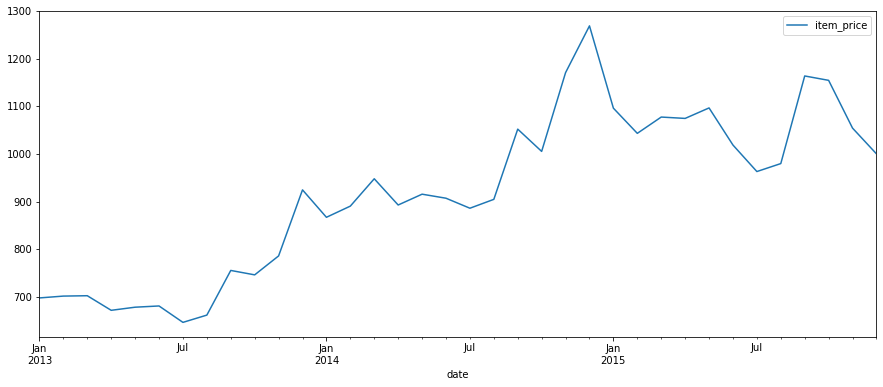

In [25]:
y.plot(figsize=(15, 6))
plt.show()

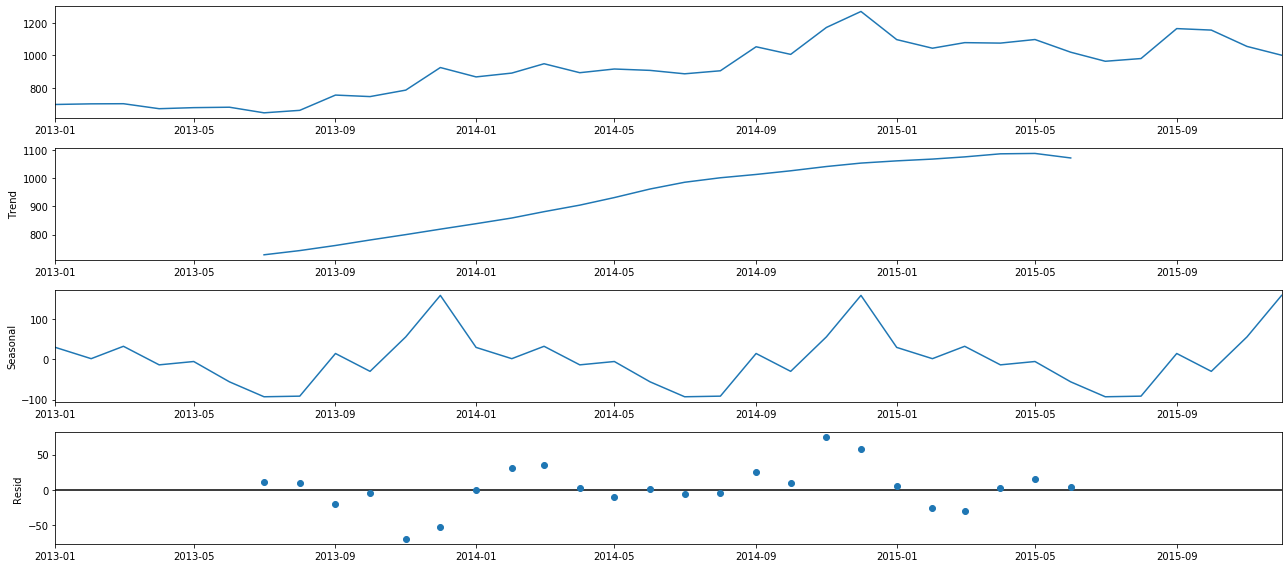

In [26]:

from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [30]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [31]:

# This step is parameter Selection for our furniture’s sales ARIMA Time Series Model. 
# Our goal here is to use a “grid search” to find the optimal set of parameters that yields the best performance for our model

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:580.5753868821474
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:371.30879990457976
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:314.9736541503544
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:144.4370250402891
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:315.21034406411195
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:299.2980535114645
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:158.0354000599864
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:146.19209676816428
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:523.7900330617705
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:331.52789921387307
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:281.42625978102365
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:125.87872693435952
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:299.07407318250193
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:274.08234909038777
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:149.3476267339623
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:126.94122835982837
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:392.78425975509737
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:261.70822584384155

In [32]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5098      2.377      0.214      0.830      -4.150       5.169
ma.L1          0.4481      2.266      0.198      0.843      -3.993       4.890
ar.S.L12      -0.8178      0.974     -0.840      0.401      -2.726       1.090
ma.S.L12       0.9994      0.854      1.170      0.242      -0.675       2.674
sigma2      2264.0742      0.000      6e+06      0.000    2264.073    2264.075


ValueError: operands could not be broadcast together with shapes (9,) (7,) (9,) 

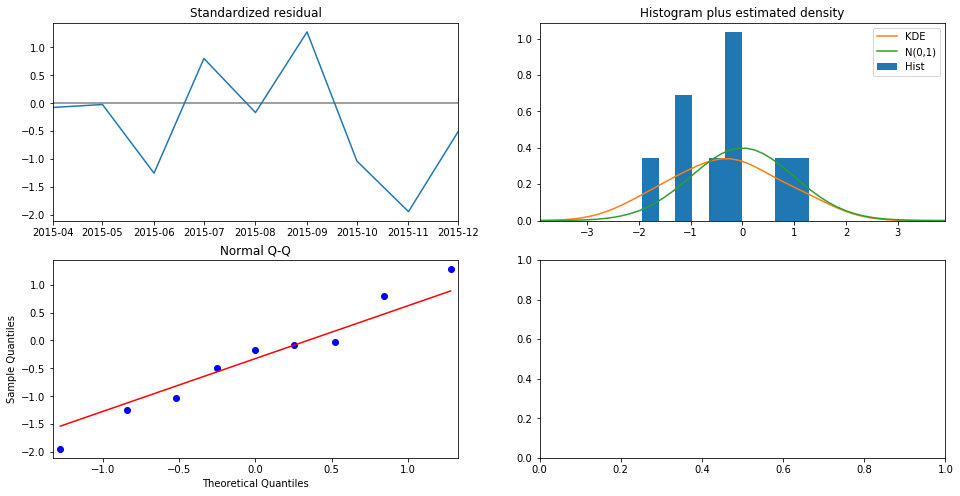

In [33]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

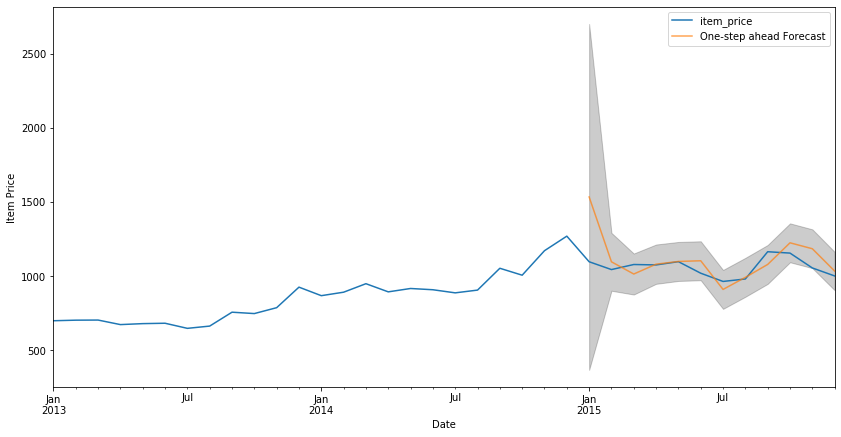

In [39]:

# Validating forecasts

pred = results.get_prediction(start=pd.to_datetime('2015-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2013':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Item Price')
plt.legend()
plt.show()

In [46]:

# In statistics, the mean squared error (MSE) of an estimator measures the average of the squares of the errors — 
# that is, the average squared difference between the estimated values and what is estimated. 
# The MSE is a measure of the quality of an estimator — it is always non-negative, and the smaller the MSE, 
# the closer we are to finding the line of best fit.

from sklearn.metrics import mean_squared_error

y_forecasted = pred.predicted_mean
y_truth = y['2015-01-01':]
# print("forecasted",y_forecasted)
# print("y_truth",y_truth)
mse = mean_squared_error(y_truth,y_forecasted)
# mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 19888.95


In [47]:
# Root Mean Square Error (RMSE) tells us that our model was able to forecast the average daily furniture sales in the test set 
# within 151.64 of the real sales. Our furniture daily sales range from around 400 to over 1200. In my opinion, 
# this is a pretty good model so far.

print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 141.03


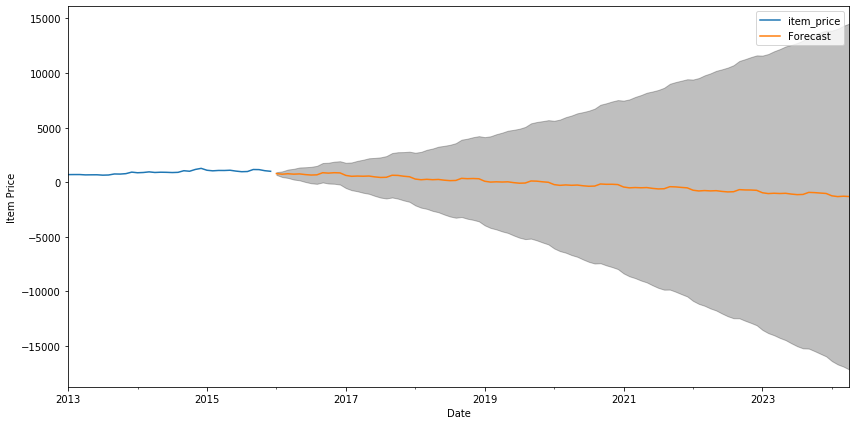

In [52]:

# Producing and visualizing forecasts

pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Item Price')
plt.legend()
plt.show()